# Postdam PM2.5 Linear Regression Forcasting 

* With Ridge And Lasso Regression Models
* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [2]:
# import src
import model_base as mb
import linear_regression as lr

## Data Exploration

* Load Data


In [3]:
df = mb.get_cleaned_df()
df.head()

,Start_Timestamp,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [4]:
mb.set_start_index(df, 'Start_Timestamp')
df.head()

,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start_Timestamp,,,,,,,,,,,,,,,,,,,,,
1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


# Linear Regression 


Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. When applied to time series data, linear regression can help analyze and forecast trends over time.

In [5]:
# Defining Target and feature variables
X,y = mb.define_target_features(df)

## Splitting Data 

Train, Validation and Test data

In [6]:
train_data, validation_data, test_data = mb.split_data(df)

Training set size: 52588
Validation set size: 17529
Test set size: 17531


In [7]:
# Scale the features
X_train_scaled, X_val_scaled, X_test_scaled = mb.scale_features(train_data, validation_data, test_data)

## Principle Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

In [8]:
# Apply PCA on the scaled data
pca = mb.init_pca()
pca.fit(X_train_scaled) 

PCA(n_components=0.95)

In [9]:
# Transform the datasets using the fitted PCA
X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
# Extract the target variable
y_train, y_val, y_test = mb.extract_target(train_data, validation_data, test_data)

## Model Creation
* Initialize Linear Regression Model
* Train model

In [11]:
# Initialize and train the linear regression model
model = lr.init_linear_model()
model.fit(X_train_pca, y_train)

LinearRegression()

# Evaluation 

## With Validation Data

Error metrics MAE, MSE, RMSE, MASE, MAPE

* Regarding the MASE metric, calculating it requires a baseline prediction model for the time series, which is typically done by using the last observed value to predict the next (in the simplest case) or using more complex methods like ARIMA for one-step ahead forecasting. This is not included in the above script as it would require additional steps to implement the naive forecasting method for a time series.

### Predict Validation


In [12]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val_pca)

print(y_val_pred)


[10.65613175  9.00218368  8.49414407 ...  9.74688202 10.15845453
 10.05854868]


In [13]:
# Error Metric
mb.evolve_error_metrics(y_val,y_val_pred)
mb.naive_mean_absolute_scaled_error(y_val,y_val_pred)

MAE: 2.2927
MSE: 12.6822
RMSE: 3.5612
MAPE: 0.3426
MASE: 2.2119725489718594


2.2119725489718594

## With Test Data


In [14]:
# Predict on the test set
y_test_pred = model.predict(X_test_pca)

# Error Metric
mb.evolve_error_metrics(y_test,y_test_pred)
mb.naive_mean_absolute_scaled_error(y_test,y_test_pred)

MAE: 2.3551
MSE: 10.8163
RMSE: 3.2888
MAPE: 0.3231
MASE: 2.1803572595098566


2.1803572595098566

## Plot Table 


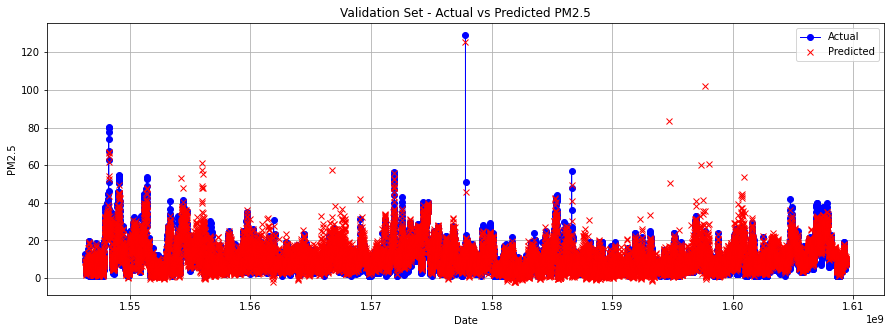

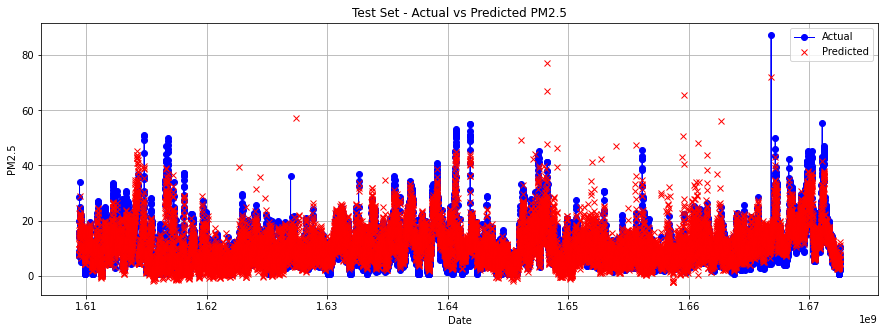

In [15]:
mb.plot_pm_true_predict(validation_data, y_val_pred, 'Validation')
mb.plot_pm_true_predict(test_data, y_test_pred, 'Test')

# HyperPramater Tuning

Linear Regression typically has fewer hyperparameters than other models like neural networks or ensemble models. However, there are still some aspects of the model that you can adjust. For instance, you can apply regularization, which can be considered a form of hyperparameter tuning. The most common types of regularized linear regression are Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization).

## Ridge Regression (L2)
Ridge regression, also known as Tikhonov regularization, is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated. In multicollinear data, least-squares estimates are unbiased, but their variances are large, so they may be far from the true value. Ridge regression adds a degree of bias to the regression estimates, which often results in a decrease in the standard errors.

* RandomizedSearchCV is a useful alternative to GridSearchCV when the parameter space is large. It samples a fixed number of parameter combinations from the specified distributions, which can be much more efficient, especially when some hyperparameters do not influence the performance of the model significantly.


### Model Creation

In [16]:
# Define the model
ridge_random_search = lr.init_ridge_model_with_random()


### Model Train

In [17]:
# Fit the random search to the data (use the PCA-transformed data)
ridge_random_search.fit(X_train_pca, y_train)

# Print the best parameters
print('Best parameters found: ', ridge_random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'alpha': 55.221271236023995}


In [18]:
# Use the best estimator to make predictions
y_val_pred = ridge_random_search.best_estimator_.predict(X_val_pca)
y_test_pred = ridge_random_search.best_estimator_.predict(X_test_pca)

In [19]:
# Validation Set

# Error Metric
mb.evolve_error_metrics(y_val,y_val_pred)
mb.naive_mean_absolute_scaled_error(y_val,y_val_pred)

MAE: 2.2934
MSE: 12.6792
RMSE: 3.5608
MAPE: 0.3427
MASE: 2.2127182414910775


2.2127182414910775

In [20]:
# Test Set

# Error Metric
mb.evolve_error_metrics(y_test,y_test_pred)
mb.naive_mean_absolute_scaled_error(y_test,y_test_pred)


MAE: 2.3553
MSE: 10.8144
RMSE: 3.2885
MAPE: 0.3231
MASE: 2.180546351956728


2.180546351956728

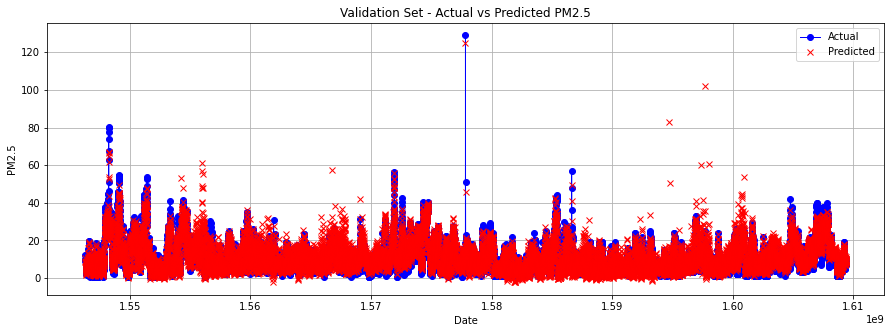

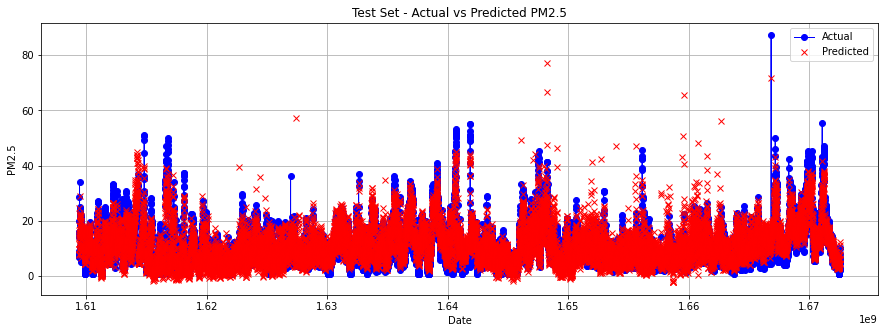

In [21]:
mb.plot_pm_true_predict(validation_data, y_val_pred, 'Validation')
mb.plot_pm_true_predict(test_data, y_test_pred, 'Test')

## Lasso Regression (L1)

Lasso regression, which stands for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e., models with fewer parameters). This is particularly useful when you have a large number of predictors because it automatically performs variable selection.

The key difference between ridge regression and lasso regression lies in the penalty term added to the cost function. While ridge regression adds a squared magnitude of the coefficient as a penalty term to the cost function, lasso regression adds the absolute value of the magnitude of the coefficient as the penalty term.

The advantages of lasso regression include:

* It can produce simpler and more interpretable models due to feature selection.
* It is less prone to overfitting as it penalizes the absolute size of the coefficients.
* It can handle complex scenarios with many variables or features in the dataset.

However, lasso regression can also have disadvantages, such as biasing estimates towards zero and sometimes underperforming when all variables are included in the true model. It can also struggle with grouped variables, where it tends to select only one variable from a group and ignore the others.

### Model Creation


In [22]:
# Define the model
lasso_rando_search= lr.init_lasso_model_with_random()

### Model Training

In [23]:
# Fit the random search to the data (use the PCA-transformed data)
lasso_rando_search.fit(X_train_pca, y_train)

# Print the best parameters
print('Best parameters found: ', lasso_rando_search.best_params_)

# Use the best estimator to make predictions
y_val_pred = lasso_rando_search.best_estimator_.predict(X_val_pca)
y_test_pred = lasso_rando_search.best_estimator_.predict(X_test_pca)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'alpha': 0.00010521761868451127}


In [24]:
# Validation Set

# Error Metric
mb.evolve_error_metrics(y_val,y_val_pred)
mb.naive_mean_absolute_scaled_error(y_val,y_val_pred)

MAE: 2.2927
MSE: 12.6822
RMSE: 3.5612
MAPE: 0.3426
MASE: 2.212005202794269


2.212005202794269

In [25]:
# Test Set

# Error Metric
mb.evolve_error_metrics(y_test,y_test_pred)
mb.naive_mean_absolute_scaled_error(y_test,y_test_pred)


MAE: 2.3551
MSE: 10.8164
RMSE: 3.2888
MAPE: 0.3231
MASE: 2.1803799549207787


2.1803799549207787

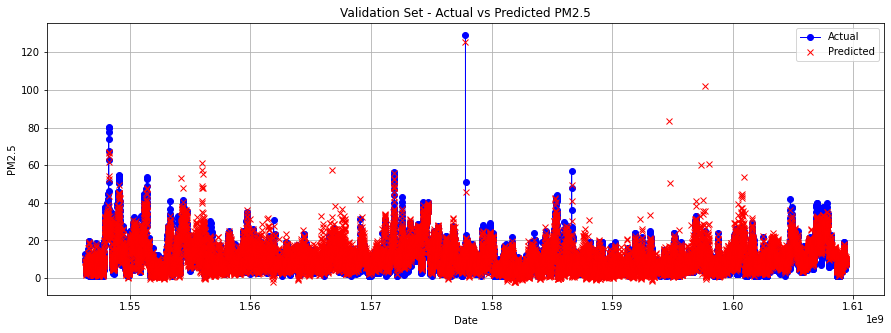

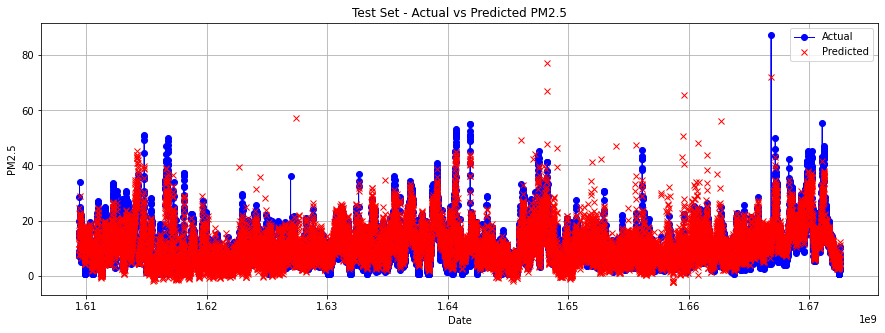

In [26]:
mb.plot_pm_true_predict(validation_data, y_val_pred, 'Validation')
mb.plot_pm_true_predict(test_data, y_test_pred, 'Test')

# Result :

Linear Regression showed best MASE result.
NOTE: COmpaire with other metrics